# USG manufacturing 
problem statement:- Dimensionality reduction , 
    please keep in mind we need the original identity 
    of the input variables(indepdent variables after dimensionality reduction)

In [2]:
#import the basic libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

We will cover here various concepts:-
    PCA
    Dimesnionality reduction without PCA
    Balancing the Data set approach
    Bagging method
    OOBS concept Random forest
    Boosting approach  
    

In [4]:
original_data=pd.read_csv("ultrasound_1.csv")

In [5]:
df=original_data.copy()

In [6]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2973.86,2359.01,2196.6555,1066.1908,1.2188,100.0,101.8900,0.1215,1.4544,-0.0052,...,NaN,0.5025,0.0128,0.0040,2.5391,0.0199,0.0117,0.0043,58.5665,1
1,3052.82,2525.33,2186.2667,1088.7359,1.2723,100.0,103.5633,0.1216,1.4891,-0.0007,...,131.2543,0.5003,0.0150,0.0043,2.9976,0.0228,0.0299,0.0105,131.2543,-1
2,2914.47,2492.14,2181.6111,1083.3937,1.2484,100.0,104.1478,0.1219,1.5568,-0.0214,...,NaN,0.4939,0.0136,0.0037,2.7633,0.0228,0.0299,0.0105,131.2543,-1
3,2959.86,2491.19,2208.0000,1835.9832,1.5714,100.0,100.2478,0.1239,1.4680,0.0033,...,128.2819,0.4993,0.0138,0.0038,2.7630,0.0140,0.0180,0.0054,128.2819,1
4,2964.77,2524.44,2181.5111,1177.0830,1.3012,100.0,100.9333,0.1216,1.4047,-0.0080,...,NaN,0.4984,0.0155,0.0040,3.1012,0.0140,0.0180,0.0054,128.2819,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1577 entries, 0 to 1576
Columns: 577 entries, 0 to Pass/Fail
dtypes: float64(576), int64(1)
memory usage: 6.9 MB


In [8]:
df["Pass/Fail"].value_counts()

-1    1472
 1     105
Name: Pass/Fail, dtype: int64

In [9]:
df["Pass/Fail"].value_counts(normalize=True)

-1    0.933418
 1    0.066582
Name: Pass/Fail, dtype: float64

In [10]:
df["Pass/Fail"]=df["Pass/Fail"].map({-1:0,1:1})
df["Pass/Fail"].value_counts()

0    1472
1     105
Name: Pass/Fail, dtype: int64

In [11]:
# make a pie 

In [12]:
# finding the missing value
df.isnull().sum().sum()

42093

In [13]:
df.isnull().sum()

0             5
1             7
2            14
3            14
4            14
             ..
586           0
587           0
588           0
589           0
Pass/Fail     0
Length: 577, dtype: int64

In [14]:
# apply the median approach handling the missing value 

In [15]:
df=df.fillna(df.median())
df.isnull().sum().sum()

0

# learning the pca concept although this problem statement not a perfect candidate of PCA

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [17]:
X=df.drop("Pass/Fail",axis=1)
Y=df["Pass/Fail"]

In [18]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [19]:
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.20,random_state=101,stratify=Y)

In [20]:
#Lets check the performance with all columns
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)

RandomForestClassifier()

In [21]:
Y_pred=rf.predict(X_test)
cm=confusion_matrix(Y_test,Y_pred)
cm

array([[295,   0],
       [ 20,   1]], dtype=int64)

In [22]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       295
           1       1.00      0.05      0.09        21

    accuracy                           0.94       316
   macro avg       0.97      0.52      0.53       316
weighted avg       0.94      0.94      0.91       316



In [23]:
# apply the PCA 


In [24]:
from sklearn.decomposition import PCA
pca=PCA()
pca=pca.fit(X_scaled)

In [25]:
pca.explained_variance_ratio_

array([5.47619431e-02, 3.67908024e-02, 2.82218597e-02, 2.55737668e-02,
       2.19366553e-02, 2.06178324e-02, 1.98226948e-02, 1.81043933e-02,
       1.66654380e-02, 1.60465321e-02, 1.47602898e-02, 1.33419303e-02,
       1.30917975e-02, 1.28967098e-02, 1.26620972e-02, 1.19900323e-02,
       1.14977172e-02, 1.13022167e-02, 1.10211838e-02, 1.05313350e-02,
       1.02022626e-02, 1.00221357e-02, 9.99030418e-03, 9.72173593e-03,
       9.48280146e-03, 9.32655112e-03, 9.26824367e-03, 8.93172316e-03,
       8.60495851e-03, 8.52139026e-03, 8.35379041e-03, 8.19948086e-03,
       8.17067679e-03, 7.95315500e-03, 7.73919126e-03, 7.71940630e-03,
       7.58841353e-03, 7.51576432e-03, 7.30508346e-03, 7.18199965e-03,
       7.10675367e-03, 6.92018407e-03, 6.85616391e-03, 6.75614835e-03,
       6.69584300e-03, 6.57528035e-03, 6.42002097e-03, 6.26282159e-03,
       6.23643422e-03, 6.09915459e-03, 6.07748494e-03, 5.97626508e-03,
       5.91289830e-03, 5.71300082e-03, 5.66363859e-03, 5.54403443e-03,
      

In [26]:
len(pca.explained_variance_ratio_)

576

Text(0, 0.5, 'Explained variance raio')

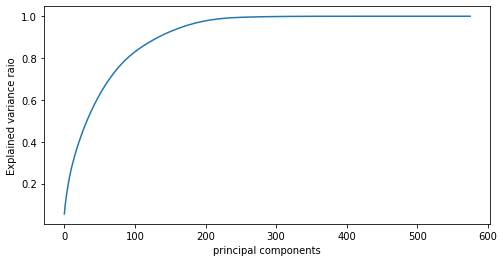

In [27]:
plt.figure(figsize=(8,4))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("principal components")
plt.ylabel("Explained variance raio")

In [28]:
pca_200=PCA(n_components=200)
pca_applied=pca_200.fit_transform(X_scaled)

In [29]:
pca_applied_df=pd.DataFrame(data=pca_applied)

In [30]:
pca_applied_df.head()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,-1.525916,3.696622,2.287973,-4.642870,0.438883,-2.808041,-2.453813,3.862617,5.115351,-0.857741,...,-0.796238,0.338324,-0.527137,0.905725,-0.755983,0.272208,0.034939,-0.553076,0.677576,-0.160729
1,-0.624775,1.680499,2.358534,-2.343379,0.532350,0.398344,-3.119943,0.124351,3.087616,-1.562967,...,-0.834172,0.031387,-0.513923,0.625167,0.525132,0.217601,-0.341322,0.030962,0.698717,0.142218
2,-1.685583,2.408470,0.647353,-0.823922,-0.850029,-2.631963,-0.974666,3.344396,1.415521,-1.177685,...,0.197206,-0.594752,0.561322,-0.130757,0.443967,0.676970,-0.799738,-0.316720,0.353343,-0.484510
3,-2.094079,3.182130,0.875445,-2.815955,0.284866,-0.961272,-3.788064,0.780538,2.163029,-0.291415,...,-0.354761,0.063193,0.235589,0.212775,0.083161,-0.376987,-0.174541,-0.549713,0.714349,0.492808
4,-1.041194,1.822960,1.100425,-2.793463,0.265398,-1.071624,-2.278646,0.174761,3.262954,-1.527873,...,-0.240981,-0.343434,0.095471,0.451762,0.300317,-0.268090,-0.444384,0.190957,-0.547879,0.291428


In [31]:
X_trainPCA,X_testPCA,Y_trainPCA,Y_testPCA=train_test_split(pca_applied_df,Y,test_size=0.20,random_state=101,stratify=Y)

In [32]:
rf.fit(X_trainPCA,Y_trainPCA)

RandomForestClassifier()

In [33]:
Y_predPCA=rf.predict(X_testPCA)
cm1=confusion_matrix(Y_testPCA,Y_predPCA)
cm1

array([[294,   1],
       [ 19,   2]], dtype=int64)

In [34]:
# in this problem statement we have to spply other approach to reduce the dimension

In [35]:
df1=original_data.copy()

In [36]:
df1.isnull().sum()/len(df1)*100

0            0.317058
1            0.443881
2            0.887762
3            0.887762
4            0.887762
               ...   
586          0.000000
587          0.000000
588          0.000000
589          0.000000
Pass/Fail    0.000000
Length: 577, dtype: float64

In [37]:
(df1.isnull().sum()/len(df1)*100).head()

0    0.317058
1    0.443881
2    0.887762
3    0.887762
4    0.887762
dtype: float64

In [38]:
high_null=df1.isnull().sum()/len(df1)
high_missing=high_null[high_null>=0.60].index

In [39]:
high_missing.shape

(24,)

In [40]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1577 entries, 0 to 1576
Columns: 577 entries, 0 to Pass/Fail
dtypes: float64(576), int64(1)
memory usage: 6.9 MB


In [41]:
# dropping the high missing value columns

In [42]:
df1.drop(high_missing,axis=1,inplace=True)

In [43]:
df1.isnull().sum().sum()

14789

In [44]:
# handling missing value median approach
df1.fillna(df.median(),inplace=True)
df1.isnull().sum().sum()

0

In [45]:
df1.head()

,0,1,2,3,4,5,6,7,8,9,...,577,582,583,584,585,586,587,588,589,Pass/Fail
0,2973.86,2359.01,2196.6555,1066.1908,1.2188,100.0,101.8900,0.1215,1.4544,-0.0052,...,5.1798,0.5025,0.0128,0.0040,2.5391,0.0199,0.0117,0.0043,58.5665,1
1,3052.82,2525.33,2186.2667,1088.7359,1.2723,100.0,103.5633,0.1216,1.4891,-0.0007,...,12.3326,0.5003,0.0150,0.0043,2.9976,0.0228,0.0299,0.0105,131.2543,-1
2,2914.47,2492.14,2181.6111,1083.3937,1.2484,100.0,104.1478,0.1219,1.5568,-0.0214,...,15.3820,0.4939,0.0136,0.0037,2.7633,0.0228,0.0299,0.0105,131.2543,-1
3,2959.86,2491.19,2208.0000,1835.9832,1.5714,100.0,100.2478,0.1239,1.4680,0.0033,...,14.5937,0.4993,0.0138,0.0038,2.7630,0.0140,0.0180,0.0054,128.2819,1
4,2964.77,2524.44,2181.5111,1177.0830,1.3012,100.0,100.9333,0.1216,1.4047,-0.0080,...,14.0347,0.4984,0.0155,0.0040,3.1012,0.0140,0.0180,0.0054,128.2819,1


In [46]:
df1.shape

(1577, 553)

In [47]:
df1["Pass/Fail"]=df1["Pass/Fail"].map({-1:0,1:1})
df1["Pass/Fail"].value_counts()

0    1472
1     105
Name: Pass/Fail, dtype: int64

In [48]:
df1["Pass/Fail"].value_counts(normalize=True)

0    0.933418
1    0.066582
Name: Pass/Fail, dtype: float64

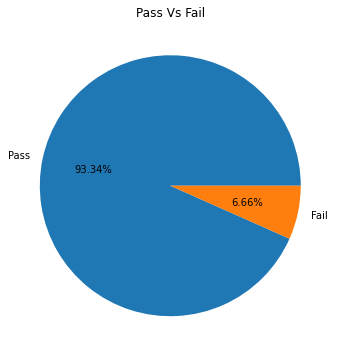

In [49]:
plt.figure(figsize=(6,6))
plt.pie(df["Pass/Fail"].value_counts(),labels=["Pass","Fail"],autopct="%1.2f%%")
plt.title("Pass Vs Fail")
plt.show()

In [50]:
df2=df1.copy()

In [51]:
# finding the columns where all values are unique
one_unique=df2.apply(pd.Series.nunique)
one_unique

0            1489
1            1497
2             502
3             512
4             502
             ... 
586           319
587           256
588           119
589           602
Pass/Fail       2
Length: 553, dtype: int64

In [52]:
const_cols=one_unique[one_unique==1].index
const_cols

Index(['5', '42', '141', '178', '179', '186', '226', '229', '230', '231',
       ...
       '529', '530', '531', '532', '533', '534', '535', '536', '537', '538'],
      dtype='object', length=104)

In [53]:
df2.head()

,0,1,2,3,4,5,6,7,8,9,...,577,582,583,584,585,586,587,588,589,Pass/Fail
0,2973.86,2359.01,2196.6555,1066.1908,1.2188,100.0,101.8900,0.1215,1.4544,-0.0052,...,5.1798,0.5025,0.0128,0.0040,2.5391,0.0199,0.0117,0.0043,58.5665,1
1,3052.82,2525.33,2186.2667,1088.7359,1.2723,100.0,103.5633,0.1216,1.4891,-0.0007,...,12.3326,0.5003,0.0150,0.0043,2.9976,0.0228,0.0299,0.0105,131.2543,0
2,2914.47,2492.14,2181.6111,1083.3937,1.2484,100.0,104.1478,0.1219,1.5568,-0.0214,...,15.3820,0.4939,0.0136,0.0037,2.7633,0.0228,0.0299,0.0105,131.2543,0
3,2959.86,2491.19,2208.0000,1835.9832,1.5714,100.0,100.2478,0.1239,1.4680,0.0033,...,14.5937,0.4993,0.0138,0.0038,2.7630,0.0140,0.0180,0.0054,128.2819,1
4,2964.77,2524.44,2181.5111,1177.0830,1.3012,100.0,100.9333,0.1216,1.4047,-0.0080,...,14.0347,0.4984,0.0155,0.0040,3.1012,0.0140,0.0180,0.0054,128.2819,1


In [54]:
# you can apply the zero variance approach also will get the same result

In [55]:
# drop the columns where 0 variance or have all values as unique

In [56]:
df2=df2.drop(const_cols,axis=1)

In [57]:
df2.shape

(1577, 449)

In [58]:
# splitting dependent and independent variable

In [59]:
X=df2.drop(["Pass/Fail"],axis=1)
Y=df2["Pass/Fail"]

In [60]:
#Scaling approach
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler

In [61]:
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)

In [62]:
X_scaled=pd.DataFrame(X_scaled,columns=X.columns)
X_scaled.head()

,0,1,2,3,4,6,7,8,9,10,...,576,577,582,583,584,585,586,587,588,589
0,0.376148,0.291207,0.534140,0.286993,0.000482,0.419322,0.906716,0.565965,0.375682,0.393629,...,0.006871,0.006471,0.771875,0.014611,0.022505,0.013765,0.307435,0.110821,0.119565,0.079433
1,0.504934,0.533060,0.493336,0.293062,0.000530,0.454832,0.907463,0.640524,0.410756,0.296928,...,0.009061,0.083901,0.703125,0.019338,0.025440,0.018469,0.331662,0.348110,0.344203,0.178019
2,0.279281,0.484797,0.475051,0.291624,0.000509,0.467237,0.909701,0.785991,0.249415,0.348123,...,0.004566,0.116911,0.503125,0.016330,0.019569,0.016065,0.331662,0.348110,0.344203,0.178019
3,0.353313,0.483415,0.578696,0.494203,0.000799,0.384471,0.924627,0.595187,0.441933,0.417520,...,0.011762,0.108377,0.671875,0.016760,0.020548,0.016062,0.258145,0.192960,0.159420,0.173988
4,0.361322,0.531766,0.474658,0.316842,0.000556,0.399019,0.907463,0.459175,0.353858,0.440273,...,0.002694,0.102326,0.643750,0.020413,0.022505,0.019532,0.258145,0.192960,0.159420,0.173988


In [63]:
# multi collinearity

In [64]:
corr_matrix=X_scaled.corr(method="spearman")

In [65]:
corr_matrix

,0,1,2,3,4,6,7,8,9,10,...,576,577,582,583,584,585,586,587,588,589
0,1.000000,-0.174254,-0.004933,0.000871,-0.003782,-0.015269,0.002752,-0.066828,0.024701,-0.008397,...,0.034483,-0.023146,0.019573,-0.020495,-0.023895,-0.020311,0.013071,-0.009036,-0.012880,-0.022351
1,-0.174254,1.000000,0.011939,-0.024861,0.026839,-0.004108,0.014045,0.034055,0.025961,0.022249,...,0.004398,-0.031562,0.034954,0.031354,0.010121,0.030342,-0.011229,0.019134,0.005577,0.013544
2,-0.004933,0.011939,1.000000,0.429100,0.103320,-0.180483,-0.441057,0.033068,0.009325,0.053804,...,0.017690,-0.078017,-0.011130,-0.004858,0.006688,-0.005072,-0.047422,-0.038042,-0.042075,-0.010301
3,0.000871,-0.024861,0.429100,1.000000,0.227607,-0.598326,0.160051,-0.039619,0.065955,0.042285,...,0.062947,0.001305,-0.003874,-0.024560,-0.031548,-0.024818,0.016755,-0.046960,-0.045129,-0.061878
4,-0.003782,0.026839,0.103320,0.227607,1.000000,-0.165679,0.119434,0.018712,0.008362,-0.009422,...,0.064258,0.055979,0.042790,0.007499,-0.001365,0.006475,0.012536,0.014989,0.019185,0.017437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,-0.020311,0.030342,-0.005072,-0.024818,0.006475,0.022376,-0.022231,-0.007609,-0.036130,0.029054,...,-0.025409,-0.028586,0.005726,0.999601,0.895902,1.000000,-0.019582,0.012017,0.020354,0.039165
586,0.013071,-0.011229,-0.047422,0.016755,0.012536,-0.021522,0.058340,0.006057,0.015694,0.015137,...,0.028346,0.032950,-0.023905,-0.020187,-0.022131,-0.019582,1.000000,0.051010,0.035499,-0.579792
587,-0.009036,0.019134,-0.038042,-0.046960,0.014989,0.010952,-0.022118,0.048744,0.045708,0.066190,...,0.028369,0.009631,-0.023467,0.011613,0.017563,0.012017,0.051010,1.000000,0.975170,0.591619
588,-0.012880,0.005577,-0.042075,-0.045129,0.019185,0.019707,-0.023402,0.053185,0.044424,0.061754,...,0.022087,0.005590,-0.018467,0.020245,0.026282,0.020354,0.035499,0.975170,1.000000,0.593667


<AxesSubplot:>

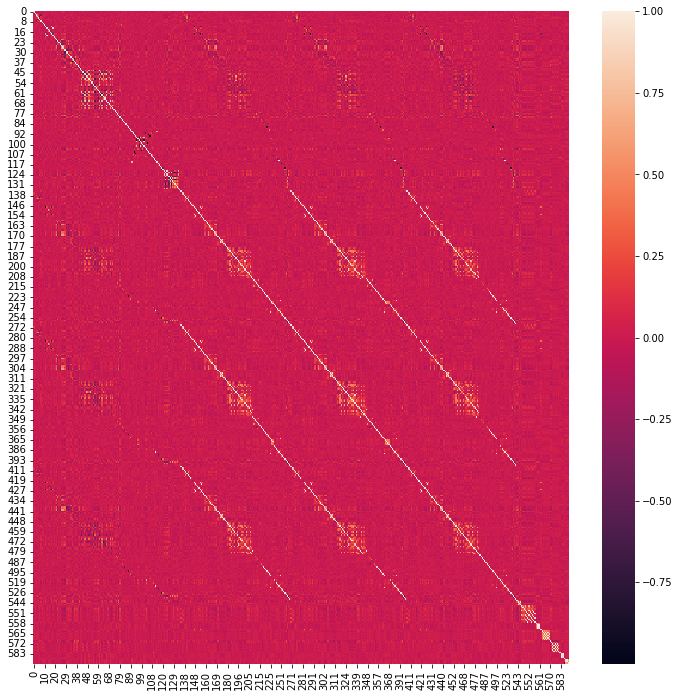

In [66]:
plt.figure(figsize=(12,12))
sns.heatmap(corr_matrix)

In [67]:
# create a upper matrix (upper triangle)

In [68]:
upper=corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))

In [69]:
upper

,0,1,2,3,4,6,7,8,9,10,...,576,577,582,583,584,585,586,587,588,589
0,NaN,-0.174254,-0.004933,0.000871,-0.003782,-0.015269,0.002752,-0.066828,0.024701,-0.008397,...,0.034483,-0.023146,0.019573,-0.020495,-0.023895,-0.020311,0.013071,-0.009036,-0.012880,-0.022351
1,NaN,NaN,0.011939,-0.024861,0.026839,-0.004108,0.014045,0.034055,0.025961,0.022249,...,0.004398,-0.031562,0.034954,0.031354,0.010121,0.030342,-0.011229,0.019134,0.005577,0.013544
2,NaN,NaN,NaN,0.429100,0.103320,-0.180483,-0.441057,0.033068,0.009325,0.053804,...,0.017690,-0.078017,-0.011130,-0.004858,0.006688,-0.005072,-0.047422,-0.038042,-0.042075,-0.010301
3,NaN,NaN,NaN,NaN,0.227607,-0.598326,0.160051,-0.039619,0.065955,0.042285,...,0.062947,0.001305,-0.003874,-0.024560,-0.031548,-0.024818,0.016755,-0.046960,-0.045129,-0.061878
4,NaN,NaN,NaN,NaN,NaN,-0.165679,0.119434,0.018712,0.008362,-0.009422,...,0.064258,0.055979,0.042790,0.007499,-0.001365,0.006475,0.012536,0.014989,0.019185,0.017437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.019582,0.012017,0.020354,0.039165
586,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.051010,0.035499,-0.579792
587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.975170,0.591619
588,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.593667


<AxesSubplot:>

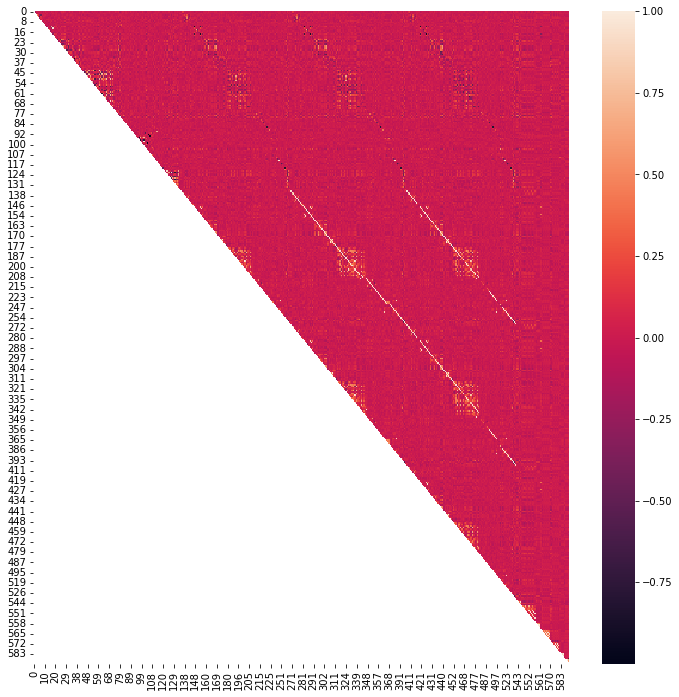

In [70]:
plt.figure(figsize=(12,12))
sns.heatmap(upper)

In [71]:
# high positive and negative corr() for + corr >0.9,  for - corr<-0.9

In [72]:
neg_corr=[column for column in upper.columns if any(upper[column]<=-0.7)]
pos_corr=[column for column in upper.columns if any(upper[column]>=0.7)]

In [73]:
print("high negative corr \n", neg_corr)
print("high positive corr \n", pos_corr)

high negative corr 
 ['36', '60', '62', '96', '98', '101', '104', '105', '106', '130', '147', '153', '222', '254', '282', '288', '360', '392', '420', '426', '472', '494', '526']
high positive corr 
 ['18', '27', '30', '46', '50', '54', '60', '62', '65', '66', '70', '98', '101', '115', '123', '124', '127', '128', '153', '154', '174', '187', '201', '202', '203', '249', '250', '270', '271', '272', '273', '274', '275', '277', '278', '279', '280', '281', '282', '283', '285', '286', '287', '288', '289', '290', '291', '294', '295', '296', '297', '298', '299', '300', '301', '302', '303', '304', '305', '306', '307', '308', '309', '310', '311', '312', '316', '317', '318', '319', '320', '321', '323', '324', '331', '332', '333', '334', '335', '337', '338', '339', '340', '341', '342', '343', '344', '347', '348', '349', '350', '351', '352', '353', '354', '355', '356', '357', '359', '360', '361', '362', '363', '365', '366', '376', '377', '385', '386', '387', '388', '389', '390', '391', '392', '393', 

In [74]:
total_corr=neg_corr+pos_corr
print("no. of high corr columns need to drop \n",len(total_corr))

no. of high corr columns need to drop 
 236


In [75]:
X_scaled.shape

(1577, 448)

In [76]:
X_scaled=X_scaled.drop(total_corr,axis=1)
print("after drop of multi collinear columns:- size is \n", X_scaled.shape)

after drop of multi collinear columns:- size is 
 (1577, 225)


In [77]:
X_scaled.head()

,0,1,2,3,4,6,7,8,9,10,...,565,570,571,572,573,582,583,586,587,589
0,0.376148,0.291207,0.534140,0.286993,0.000482,0.419322,0.906716,0.565965,0.375682,0.393629,...,0.047840,0.800072,0.746490,0.007249,0.024460,0.771875,0.014611,0.307435,0.110821,0.079433
1,0.504934,0.533060,0.493336,0.293062,0.000530,0.454832,0.907463,0.640524,0.410756,0.296928,...,0.104079,0.785253,0.727392,0.009428,0.099531,0.703125,0.019338,0.331662,0.348110,0.178019
2,0.279281,0.484797,0.475051,0.291624,0.000509,0.467237,0.909701,0.785991,0.249415,0.348123,...,0.159418,0.798316,0.691355,0.004781,0.127324,0.503125,0.016330,0.331662,0.348110,0.178019
3,0.353313,0.483415,0.578696,0.494203,0.000799,0.384471,0.924627,0.595187,0.441933,0.417520,...,0.341332,0.801421,0.804979,0.012474,0.132864,0.671875,0.016760,0.258145,0.192960,0.173988
4,0.361322,0.531766,0.474658,0.316842,0.000556,0.399019,0.907463,0.459175,0.353858,0.440273,...,0.070036,0.803544,0.696015,0.002824,0.113944,0.643750,0.020413,0.258145,0.192960,0.173988


In [78]:
# VIF approach variance inflation factor

In [79]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [80]:
# without adding constant 

In [81]:
vif10=pd.DataFrame()
vif10["variables"]=X_scaled.columns


In [82]:
vif10["VIF_Value"]=[variance_inflation_factor(X_scaled.values,i)for i in range(X_scaled.shape[1])]
vif10

,variables,VIF_Value
0,0,18.876077
1,1,23.135067
2,2,38.850359
3,3,32.659662
4,4,28365.689114
...,...,...
220,582,59.262432
221,583,1.907735
222,586,21.198742
223,587,6.041836


In [83]:
high_VIF10=vif10[vif10["VIF_Value"]>10]
high_VIF10.shape

(145, 2)

In [84]:
# adding the constant 

In [85]:
import statsmodels.api as sm
X1=sm.add_constant(X_scaled)

In [86]:
X1.head()

,const,0,1,2,3,4,6,7,8,9,...,565,570,571,572,573,582,583,586,587,589
0,1.0,0.376148,0.291207,0.534140,0.286993,0.000482,0.419322,0.906716,0.565965,0.375682,...,0.047840,0.800072,0.746490,0.007249,0.024460,0.771875,0.014611,0.307435,0.110821,0.079433
1,1.0,0.504934,0.533060,0.493336,0.293062,0.000530,0.454832,0.907463,0.640524,0.410756,...,0.104079,0.785253,0.727392,0.009428,0.099531,0.703125,0.019338,0.331662,0.348110,0.178019
2,1.0,0.279281,0.484797,0.475051,0.291624,0.000509,0.467237,0.909701,0.785991,0.249415,...,0.159418,0.798316,0.691355,0.004781,0.127324,0.503125,0.016330,0.331662,0.348110,0.178019
3,1.0,0.353313,0.483415,0.578696,0.494203,0.000799,0.384471,0.924627,0.595187,0.441933,...,0.341332,0.801421,0.804979,0.012474,0.132864,0.671875,0.016760,0.258145,0.192960,0.173988
4,1.0,0.361322,0.531766,0.474658,0.316842,0.000556,0.399019,0.907463,0.459175,0.353858,...,0.070036,0.803544,0.696015,0.002824,0.113944,0.643750,0.020413,0.258145,0.192960,0.173988


In [87]:
vif1=pd.DataFrame()
vif1["variables"]=X1.columns
vif1["VIF_Value"]=[variance_inflation_factor(X1.values,i)for i in range(X1.shape[1])]
vif1

,variables,VIF_Value
0,const,13404.884326
1,0,1.300614
2,1,1.232410
3,2,1.640549
4,3,2.960586
...,...,...
221,582,1.320671
222,583,1.261519
223,586,1.986605
224,587,1.858423


In [88]:
high_vif=vif1[vif1["VIF_Value"]>10]
high_vif.shape

(38, 2)

In [89]:
high_vif["variables"]

0      const
5          4
13        14
15        16
23        25
24        26
27        31
30        34
37        43
39        45
41        48
42        51
49        61
50        63
51        64
52        67
55        72
56        73
87       117
105      140
111      148
112      150
114      152
122      164
123      165
141      188
143      196
144      197
146      199
148      204
149      205
150      207
152      209
174      252
180      336
181      345
182      346
187      423
Name: variables, dtype: object

In [90]:
# we can drop high VIF columns

In [91]:
X1=X1.drop(high_vif["variables"],axis=1)
X1.shape

(1577, 188)

In [92]:
#feature importance approach 

In [93]:
# recursive feature elemination CV

In [94]:
from sklearn.feature_selection import RFECV,SelectFromModel

In [95]:
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier

In [96]:
# using select from model function on RF to find the best features

In [97]:
rf=RandomForestClassifier(random_state=100,n_jobs=-1)

In [98]:
sfm=SelectFromModel(rf)
sfm.fit(X1,Y)

SelectFromModel(estimator=RandomForestClassifier(n_jobs=-1, random_state=100))

In [99]:
print("Benchmark average significant value :",np.mean(sfm.estimator_.feature_importances_))

Benchmark average significant value : 0.005319148936170213


In [100]:
sfm.get_support()

array([ True, False,  True, False, False, False, False, False,  True,
       False,  True, False,  True, False, False,  True,  True, False,
       False,  True, False, False,  True, False, False,  True, False,
        True, False,  True,  True, False,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
        True,  True,  True, False, False,  True,  True,  True, False,
       False, False,  True, False, False,  True,  True,  True,  True,
        True, False,  True, False, False, False, False,  True,  True,
        True, False, False, False,  True, False,  True, False, False,
       False, False, False,  True, False, False, False,  True, False,
       False, False, False,  True,  True, False, False, False,  True,
        True, False,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False,  True,  True,  True, False,  True,  True,
       False, False,

In [101]:
feature_selected_sfm=X1.columns[sfm.get_support()]
feature_selected_sfm

Index(['0', '2', '10', '12', '17', '21', '22', '28', '33', '38', '40', '44',
       '47', '55', '57', '58', '59', '68', '71', '75', '76', '77', '78', '81',
       '82', '83', '87', '88', '89', '93', '99', '100', '102', '103', '107',
       '112', '119', '120', '121', '129', '132', '138', '144', '156', '159',
       '163', '166', '168', '169', '200', '210', '211', '212', '214', '215',
       '218', '221', '225', '228', '238', '247', '248', '267', '468', '488',
       '489', '500', '510', '550', '551', '559', '562', '565', '571', '573',
       '582', '583', '586', '587'],
      dtype='object')

In [102]:
len(feature_selected_sfm)

79

In [103]:
X1_final=X1[feature_selected_sfm]
X1_final.head()

,0,2,10,12,17,21,22,28,33,38,...,551,559,562,565,571,573,582,583,586,587
0,0.376148,0.534140,0.393629,0.179374,0.968426,0.110171,0.834530,0.345946,0.067558,0.594883,...,0.055621,0.260211,0.332909,0.047840,0.746490,0.024460,0.771875,0.014611,0.307435,0.110821
1,0.504934,0.493336,0.296928,0.229333,0.973360,0.120276,0.829470,0.586184,0.065284,0.559996,...,0.028008,0.506575,0.284586,0.104079,0.727392,0.099531,0.703125,0.019338,0.331662,0.348110
2,0.279281,0.475051,0.348123,0.226292,0.972866,0.246285,0.723761,0.098497,0.098272,0.942649,...,0.035108,0.344889,0.309297,0.159418,0.691355,0.127324,0.503125,0.016330,0.331662,0.348110
3,0.353313,0.578696,0.417520,0.163317,0.984953,0.085521,0.816137,0.243243,0.099135,1.000000,...,0.061538,0.092847,0.040163,0.341332,0.804979,0.132864,0.671875,0.016760,0.258145,0.192960
4,0.361322,0.474658,0.440273,0.149313,0.975333,0.111989,0.811419,0.519519,0.065284,0.559996,...,0.052071,0.506575,0.287190,0.070036,0.696015,0.113944,0.643750,0.020413,0.258145,0.192960


In [104]:
# model building process
# X1_final is all independent variable and Y is the dependent variable

In [105]:
from sklearn.model_selection import train_test_split

In [106]:
X_train,X_test,Y_train,Y_test=train_test_split(X1_final,Y,random_state=101,test_size=0.2,stratify=Y)

# try to create the model for  Decision tree, Random forest, Bagging, KNN, SVM

In [112]:
from sklearn.tree import DecisionTreeClassifier

In [117]:
dt=DecisionTreeClassifier(random_state=101,criterion='entropy')
dt_model=dt.fit(X_train,Y_train)
Y_pred=dt_model.predict(X_test)
print(confusion_matrix(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[272  23]
 [ 17   4]]
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       295
           1       0.15      0.19      0.17        21

    accuracy                           0.87       316
   macro avg       0.54      0.56      0.55       316
weighted avg       0.89      0.87      0.88       316



In [115]:
dt=DecisionTreeClassifier(random_state=101,criterion='gini')
dt_model=dt.fit(X_train,Y_train)
Y_pred=dt_model.predict(X_test)
print(confusion_matrix(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[266  29]
 [ 19   2]]
              precision    recall  f1-score   support

           0       0.93      0.90      0.92       295
           1       0.06      0.10      0.08        21

    accuracy                           0.85       316
   macro avg       0.50      0.50      0.50       316
weighted avg       0.88      0.85      0.86       316



In [118]:
rf=RandomForestClassifier(n_jobs=-1,random_state=101,criterion='entropy')
rf_model=rf.fit(X_train,Y_train)
Y_pred=rf_model.predict(X_test)
print(confusion_matrix(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[295   0]
 [ 20   1]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       295
           1       1.00      0.05      0.09        21

    accuracy                           0.94       316
   macro avg       0.97      0.52      0.53       316
weighted avg       0.94      0.94      0.91       316



# OBB SCORE

In [119]:
rf=RandomForestClassifier(n_jobs=-1,random_state=101,oob_score=True)
rf_model=rf.fit(X_train,Y_train)
Y_pred=rf_model.predict(X_test)

In [120]:
# Obtain the OOB error
oob_error = 1 - rf.oob_score_

In [122]:
print("OOB error: ",oob_error) #if this value is very high it means that for the unseen data, model is not performing good

OOB error:  0.0626486915146709


In [ ]:
The oob_score_ attribute will only be available if the oob_score 
parameter was set to True when creating the classifier.

One of the main use cases of the OOB error is to evaluate 
the performance of an ensemble model, such as a random forest. 
Because the OOB error is calculated using out-of-bag samples, 
which are samples that are not used in the training of the model, 
it provides an unbiased estimate of the model’s performance.
- Help in hyper parameter tunning
-used to diagnose overfitting/underfitting
-use as a validation score

# Gaussian

In [123]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb_model=nb.fit(X_train,Y_train)
Y_pred=nb_model.predict(X_test)
print(confusion_matrix(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[263  32]
 [ 16   5]]
              precision    recall  f1-score   support

           0       0.94      0.89      0.92       295
           1       0.14      0.24      0.17        21

    accuracy                           0.85       316
   macro avg       0.54      0.56      0.54       316
weighted avg       0.89      0.85      0.87       316



# Bagging

In [145]:
# only difference from rf model is that bagging only selects row wise data while creating subsets and rf selects in both rows and columns
# advantage in bagging is that we can combine two algorithms but in rf its only decision tree based

bgnb=BaggingClassifier() # we can pass an estimator that is an algorithm, default is decision tree
bgnb_model=bgnb.fit(X_train,Y_train)
Y_pred=bgnb_model.predict(X_test)
print(confusion_matrix(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[291   4]
 [ 20   1]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       295
           1       0.20      0.05      0.08        21

    accuracy                           0.92       316
   macro avg       0.57      0.52      0.52       316
weighted avg       0.89      0.92      0.90       316



In [124]:
# we are using bagging with naive bayes
bgnb=BaggingClassifier(nb) #nb means naive bayes
bgnb_model=bgnb.fit(X_train,Y_train)
Y_pred=bgnb_model.predict(X_test)
print(confusion_matrix(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[267  28]
 [ 15   6]]
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       295
           1       0.18      0.29      0.22        21

    accuracy                           0.86       316
   macro avg       0.56      0.60      0.57       316
weighted avg       0.90      0.86      0.88       316



### model evaluation of classification problem

### Our data is highly imbalance we will not get a good Recall for minority class

# Balancing the Dataset approach 

In [125]:
# balancing the data approach
#various methods of balancing a dataset are below

from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler, BorderlineSMOTE, SVMSMOTE, KMeansSMOTE
# when data is moderate size

from imblearn.under_sampling import TomekLinks, RandomUnderSampler, NearMiss, ClusterCentroids
# when a large dataset is there with low minority class count 

In [126]:
smote = SMOTE()
over=RandomOverSampler()

In [127]:
X_train_smote,Y_train_smote=smote.fit_resample(X_train,Y_train)  #resample because we are resampling or transforming

In [128]:
print("before balancing: " , X_train.shape)

before balancing:  (1261, 79)


In [132]:
print("before balancing \n" , Y_train.value_counts())

before balancing 
 0    1177
1      84
Name: Pass/Fail, dtype: int64


In [134]:
print("after balancing: " , X_train_smote.shape)

after balancing:  (2354, 79)


In [135]:
print("after  balancing \n" , Y_train_smote.value_counts())

after  balancing 
 0    1177
1    1177
Name: Pass/Fail, dtype: int64


In [ ]:
# boosting algorithm
#there are many boosting algirithm Gradient boosting, XGBoost, Ada Boost cat Boost .

XGBoost is the next version on top of the gradient boosting algorithm. 
The full name of the XGBoost algorithm is the eXtreme Gradient Boosting 

AdaBoost is a boosting algorithm, which also works on the principle of 
the stagewise addition method where multiple weak learners are used for 
getting strong learners. 

CatBoost the main difference that makes it different and 
better than others is the growing of decision trees in it. 
In CatBoost the decision trees which is grown are symmetric.

In [138]:
#Ada boost on Balanced Data set
#new algorithm, can try these algo's if we are not getting good accuracy in classification problems
#this is known as boosting approach


from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=5)
ada_model=ada.fit(X_train_smote,Y_train_smote)
Y_pred=ada_model.predict(X_test)
print(confusion_matrix(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[215  80]
 [ 12   9]]
              precision    recall  f1-score   support

           0       0.95      0.73      0.82       295
           1       0.10      0.43      0.16        21

    accuracy                           0.71       316
   macro avg       0.52      0.58      0.49       316
weighted avg       0.89      0.71      0.78       316



In [139]:
from xgboost import XGBClassifier

In [140]:
xgb_clf=XGBClassifier(n_estimators=30,max_depth=3,learning_rate=.3,random_state=2)
xgb_clf.fit(X_train_smote,Y_train_smote)
Y_pred=xgb_clf.predict(X_test)
print(confusion_matrix(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[268  27]
 [ 16   5]]
              precision    recall  f1-score   support

           0       0.94      0.91      0.93       295
           1       0.16      0.24      0.19        21

    accuracy                           0.86       316
   macro avg       0.55      0.57      0.56       316
weighted avg       0.89      0.86      0.88       316



In [141]:
# we are using bagging with naive bayes
bgnb=BaggingClassifier(nb)
bgnb_model=bgnb.fit(X_train_smote,Y_train_smote)
Y_pred=bgnb_model.predict(X_test)
print(confusion_matrix(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[225  70]
 [ 17   4]]
              precision    recall  f1-score   support

           0       0.93      0.76      0.84       295
           1       0.05      0.19      0.08        21

    accuracy                           0.72       316
   macro avg       0.49      0.48      0.46       316
weighted avg       0.87      0.72      0.79       316



# pip install catboost
- to make catboost work

In [142]:
from catboost import CatBoostClassifier

In [143]:
cbr = CatBoostClassifier(iterations=100,
                        depth=5,
                        learning_rate=0.01,                    
                        verbose=0)

In [144]:
cbr.fit(X_train_smote, Y_train_smote)
Y_pred = cbr.predict(X_test)
print(classification_report(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.96      0.81      0.88       295
           1       0.17      0.52      0.25        21

    accuracy                           0.79       316
   macro avg       0.56      0.67      0.57       316
weighted avg       0.91      0.79      0.84       316

[[240  55]
 [ 10  11]]


We learnt here various concepts:-
    PCA
    Dimesnionality reduction without PCA
    Balancing the Data set approach
    Bagging method
    OOBS concept Random forest
    Boosting approach  
    